<a href="https://www.kaggle.com/code/avtak96/predictive-modeling-and-analysis-of-obesity-risk?scriptVersionId=178882454" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Load Dataset**

In [3]:
# Import all necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data as df
df = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')

# Display the first few rows of the dataframe
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [5]:
# Rename column names

df.rename(columns = {
    'Gender': 'gender',
    'Age': 'age',
    'Height': 'height',
    'Weight': 'weight',
    'family_history_with_overweight': 'family_history',
    'FAVC': 'high_caloric_food_cons',
    'FCVC': 'freq_vegetables_cons',
    'NCP': 'freq_main_meals',
    'CAEC': 'food_between_meals_cons',
    'SMOKE': 'smoke',
    'CH2O': 'water_cons',
    'SCC': 'calories_cons_monitor',
    'FAF': 'freq_physical_activity',
    'TUE': 'freq_device_usage',
    'CALC': 'alcohol_usage',
    'MTRANS': 'transportation_mode',
    'NObeyesdad': 'obesity'
}, inplace=True)

print(df.head())

   gender   age  height  weight family_history high_caloric_food_cons  \
0  Female  21.0    1.62    64.0            yes                     no   
1  Female  21.0    1.52    56.0            yes                     no   
2    Male  23.0    1.80    77.0            yes                     no   
3    Male  27.0    1.80    87.0             no                     no   
4    Male  22.0    1.78    89.8             no                     no   

   freq_vegetables_cons  freq_main_meals food_between_meals_cons smoke  \
0                   2.0              3.0               Sometimes    no   
1                   3.0              3.0               Sometimes   yes   
2                   2.0              3.0               Sometimes    no   
3                   3.0              3.0               Sometimes    no   
4                   2.0              1.0               Sometimes    no   

   water_cons calories_cons_monitor  freq_physical_activity  \
0         2.0                    no                  

## **Data pre-processing**

**Duplicate records**

In [6]:
# Check if duplicates present
duplicated_rows = df[df.duplicated()]

# Count total number of duplicated rows
total_duplicated_rows = len(duplicated_rows)
print(f"Total duplicated observations: {total_duplicated_rows}")

# Drop duplicated rows from df
df = df.drop_duplicates()

# Check dimension of df1 after removing duplicates
print(df.shape)

Total duplicated observations: 24
(2087, 17)


**Missing values**

In [7]:
# Check for missing values
print(df.isnull().sum())

gender                     0
age                        0
height                     0
weight                     0
family_history             0
high_caloric_food_cons     0
freq_vegetables_cons       0
freq_main_meals            0
food_between_meals_cons    0
smoke                      0
water_cons                 0
calories_cons_monitor      0
freq_physical_activity     0
freq_device_usage          0
alcohol_usage              0
transportation_mode        0
obesity                    0
dtype: int64


**Data types**

In [8]:
# Check data types of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   2087 non-null   object 
 1   age                      2087 non-null   float64
 2   height                   2087 non-null   float64
 3   weight                   2087 non-null   float64
 4   family_history           2087 non-null   object 
 5   high_caloric_food_cons   2087 non-null   object 
 6   freq_vegetables_cons     2087 non-null   float64
 7   freq_main_meals          2087 non-null   float64
 8   food_between_meals_cons  2087 non-null   object 
 9   smoke                    2087 non-null   object 
 10  water_cons               2087 non-null   float64
 11  calories_cons_monitor    2087 non-null   object 
 12  freq_physical_activity   2087 non-null   float64
 13  freq_device_usage        2087 non-null   float64
 14  alcohol_usage            2087

In [9]:
# All categorical features to be converted from 'object' to 'category' to optimize memory usage
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].astype('category')

# Check updated data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   gender                   2087 non-null   category
 1   age                      2087 non-null   float64 
 2   height                   2087 non-null   float64 
 3   weight                   2087 non-null   float64 
 4   family_history           2087 non-null   category
 5   high_caloric_food_cons   2087 non-null   category
 6   freq_vegetables_cons     2087 non-null   float64 
 7   freq_main_meals          2087 non-null   float64 
 8   food_between_meals_cons  2087 non-null   category
 9   smoke                    2087 non-null   category
 10  water_cons               2087 non-null   float64 
 11  calories_cons_monitor    2087 non-null   category
 12  freq_physical_activity   2087 non-null   float64 
 13  freq_device_usage        2087 non-null   float64 
 14  alcohol_usage

Encoding categorical features

In [10]:
# Encode categorical features with yes/no values to 0/1
yes_no_cols = ['family_history', 'high_caloric_food_cons', 'smoke', 'calories_cons_monitor']
df[yes_no_cols] = df[yes_no_cols].apply(lambda x: x.map({'no':0, 'yes':1}))

In [11]:
# Encode 'obesity'
df['obesity'] = df['obesity'].apply(lambda x: 1 if 'Obesity' in x else 0)

In [12]:
# Encode all other categorical features
df['gender'] = df['gender'].map({'Male':0, 'Female':1})
df['food_between_meals_cons'] = df['food_between_meals_cons'].apply(lambda x: 3 if x == 'Always' else (2 if x == 'Frequently' else (1 if x == 'Sometimes' else 0)))
df['alcohol_usage'] = df['alcohol_usage'].apply(lambda x: 3 if x == 'Always' else (2 if x == 'Frequently' else (1 if x == 'Sometimes' else 0)))
df['transportation_mode'] = df['transportation_mode'].map({'Automobile':0, 'Bike':1, 'Motorbike':2, 'Public_Transportation':3, 'Walking':4})

In [13]:
print(df.head())

  gender   age  height  weight family_history high_caloric_food_cons  \
0      1  21.0    1.62    64.0              1                      0   
1      1  21.0    1.52    56.0              1                      0   
2      0  23.0    1.80    77.0              1                      0   
3      0  27.0    1.80    87.0              0                      0   
4      0  22.0    1.78    89.8              0                      0   

   freq_vegetables_cons  freq_main_meals food_between_meals_cons smoke  \
0                   2.0              3.0                       1     0   
1                   3.0              3.0                       1     1   
2                   2.0              3.0                       1     0   
3                   3.0              3.0                       1     0   
4                   2.0              1.0                       1     0   

   water_cons calories_cons_monitor  freq_physical_activity  \
0         2.0                     0                     0.0

**Correlation Matrix**

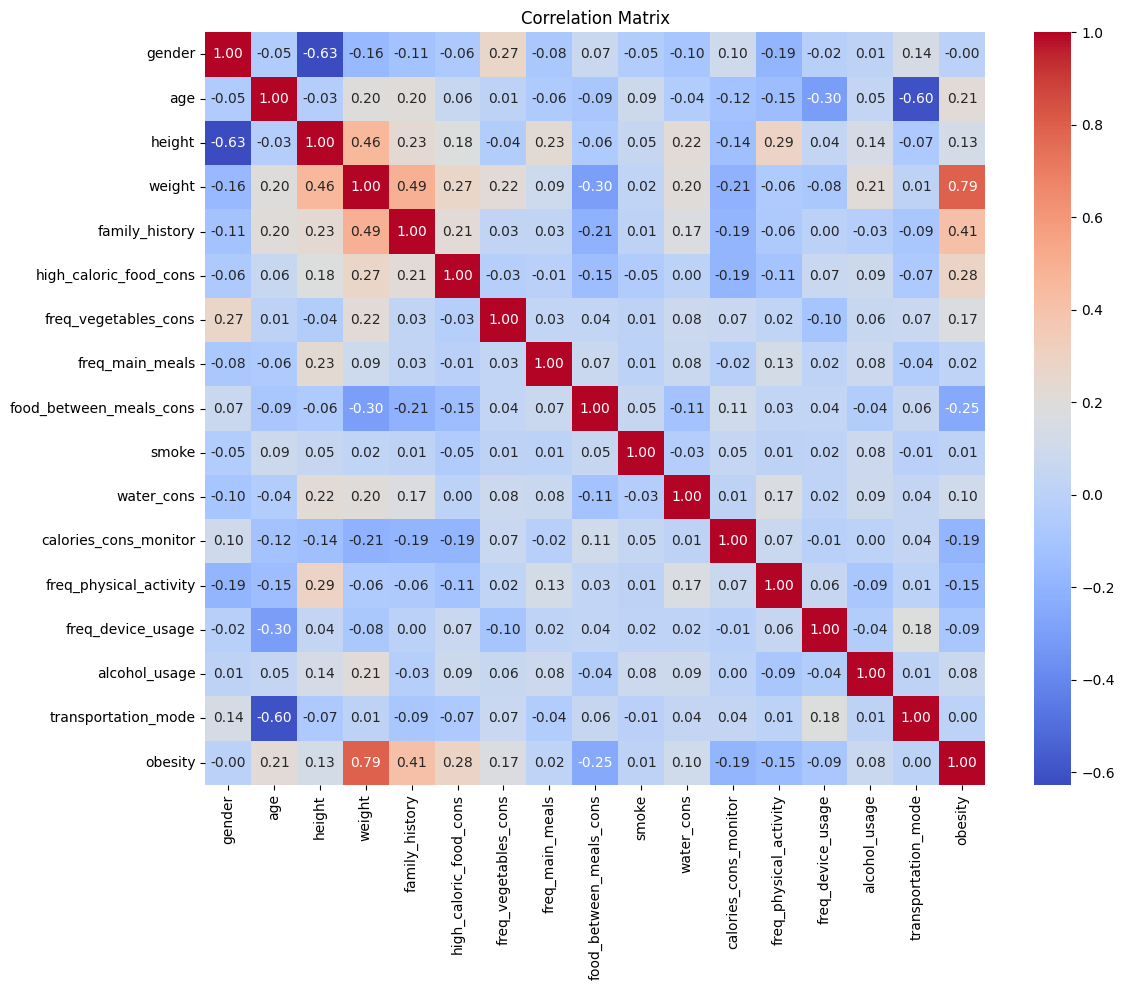

In [14]:
# Plot heatmap to visualize the correlation between the features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

**Boxplots of numerical features**

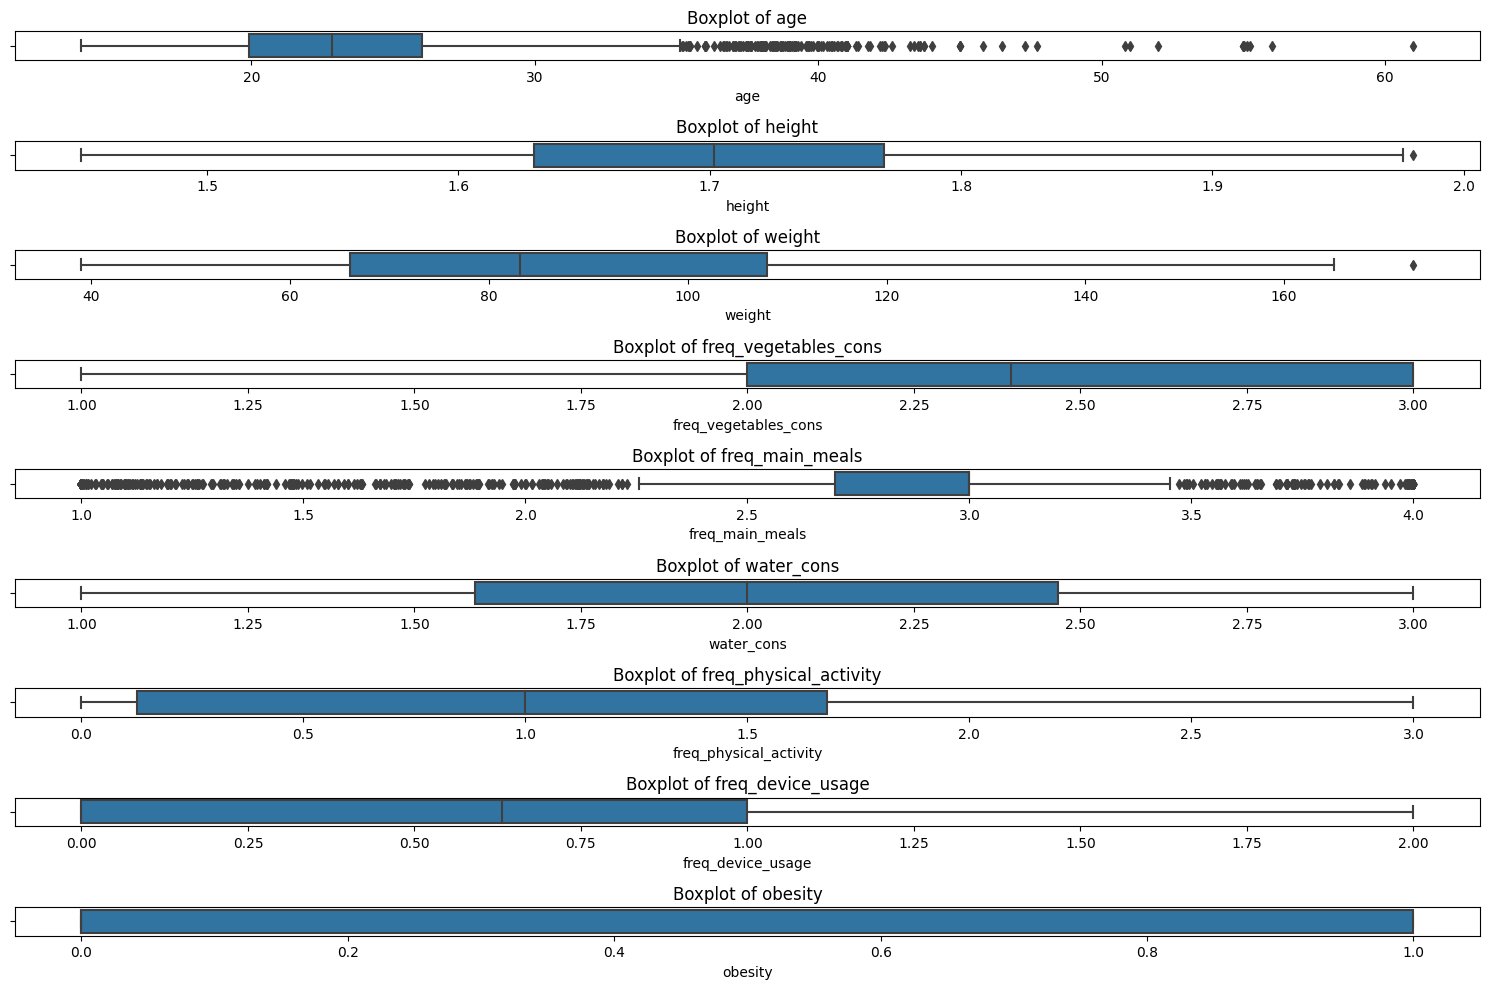

In [15]:
# Create boxplots on numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

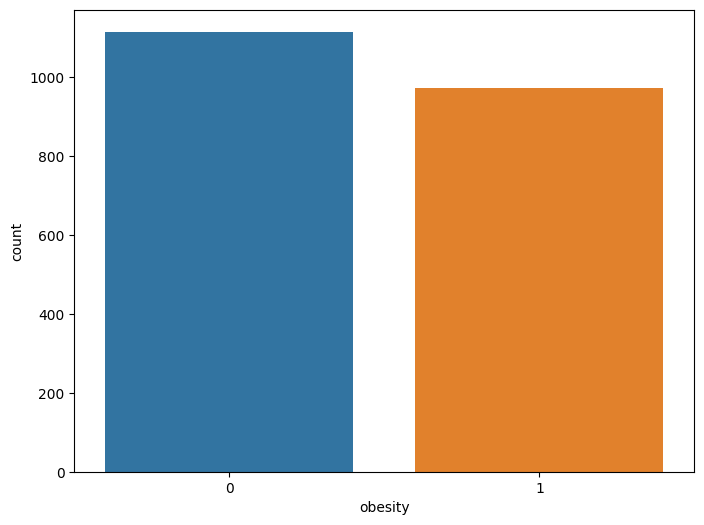

In [16]:
# Display the distribution of 'obesity'
plt.figure(figsize=(8, 6))
sns.countplot(x='obesity', data=df)
plt.show()

## **Data Modelling**

**Data splitting**

In [17]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets using a 70:30 ratio
X = df.drop('obesity', axis=1).values
y = df['obesity'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### **Model training**

**Random Forest**

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Fit classifier to X_train and y_train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict the labels of X_test
y_pred_rf = rf.predict(X_test)

# Calculate predicting probability
y_pred_rf_probs = rf.predict_proba(X_test)[:, 1]

**XGBoost**

In [19]:
from xgboost import XGBClassifier

# Fit classifier to X_train and y_train
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Predict the labels of X_test
y_pred_xgb = xgb.predict(X_test)

# Calculate predicting probability
y_pred_xgb_probs = xgb.predict_proba(X_test)[:, 1]

**Decision Tree**

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Fit classifier to X_train and y_train
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict the labels of X_test
y_pred_dtree = dtree.predict(X_test)

# Calculate predicting probability
y_pred_dtree_probs = dtree.predict_proba(X_test)[:, 1]

**Gradient Boosting**

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Fit classifier to X_train and y_train
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predict the labels of X_test
y_pred_gb = gb.predict(X_test)

# Calculate the predicting probability
y_pred_gb_probs = gb.predict_proba(X_test)[:, 1]

### **Model evaluation**

**Accuracy, Precision, Recall, F1 score**

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

metrics_rf = calculate_metrics(y_test, y_pred_rf)
metrics_xgb = calculate_metrics(y_test, y_pred_xgb)
metrics_dtree = calculate_metrics(y_test, y_pred_dtree)
metrics_gb = calculate_metrics(y_test, y_pred_gb)

modelperformance_df = pd.DataFrame({
    'Random Forest' : metrics_rf,
    'XGBoost' : metrics_xgb,
    'Decision Tree' : metrics_dtree,
    'Gradient Boosting' : metrics_gb
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(modelperformance_df)

           Random Forest   XGBoost  Decision Tree  Gradient Boosting
Accuracy        0.987241  0.993620       0.982456           0.995215
Precision       0.996503  0.989796       0.996466           0.996564
Recall          0.976027  0.996575       0.965753           0.993151
F1 Score        0.986159  0.993174       0.980870           0.994854


**ROC and AUC**

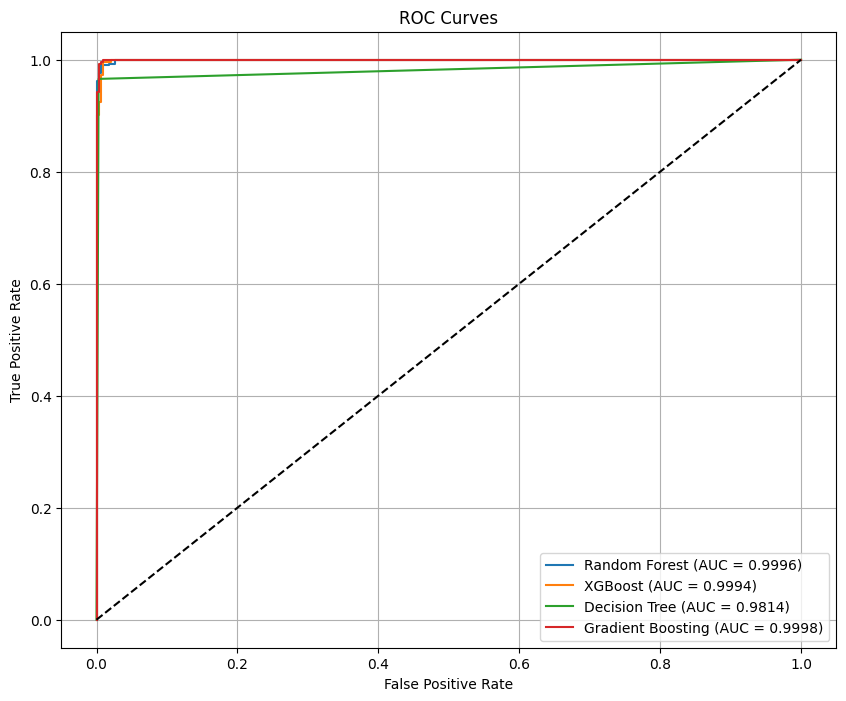

In [23]:
from sklearn.metrics import roc_curve, auc

# ROC curve for each model (Random Forest, XGBoost, Logistic Regression Scaled - 3 models with the highest accuracy score)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_probs)
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_pred_dtree_probs)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb_probs)

# AUC score for each model
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_dtree = auc(fpr_dtree, tpr_dtree)
auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curves
plt.figure(figsize=(10,8))
plt.plot(fpr_rf, tpr_rf, label = f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label = f'XGBoost (AUC = {auc_xgb:.4f})')
plt.plot(fpr_dtree, tpr_dtree, label = f'Decision Tree (AUC = {auc_dtree:.4f})')
plt.plot(fpr_gb, tpr_gb, label = f'Gradient Boosting (AUC = {auc_gb:.4f})')


plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Cross validation**

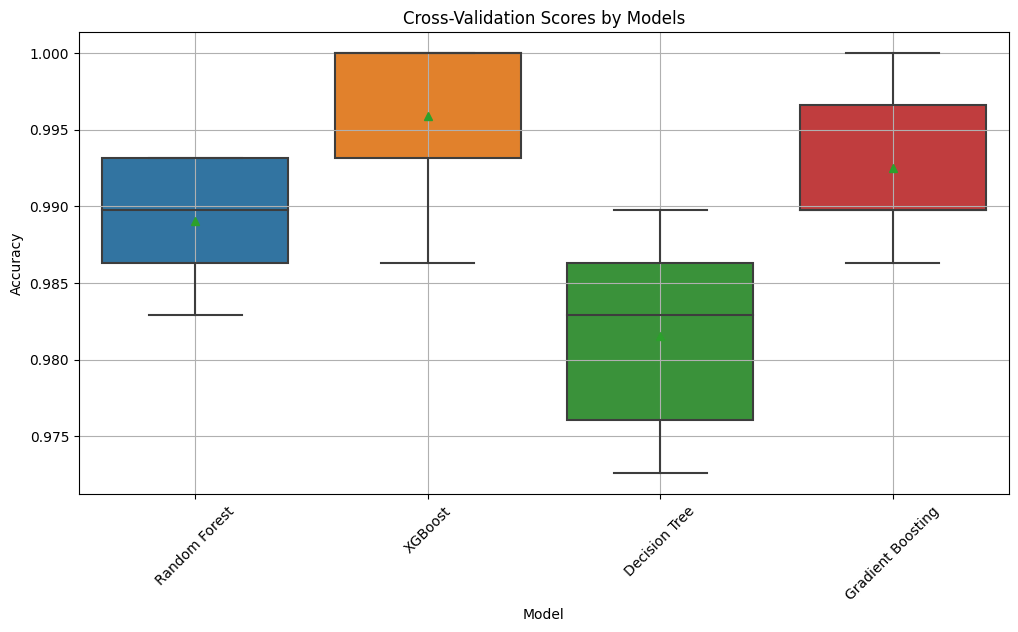

In [24]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create models dictionary including pipelines for scaled models
models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through the models' values
cv_scores = {}
for model_name, model in models.items():
  scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
  cv_scores[model_name] = scores

cv_scores_df = pd.DataFrame(cv_scores)

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=cv_scores_df, showmeans=True)
plt.title('Cross-Validation Scores by Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## **Best model**

Based on the combined evaluation of performance metrics, ROC and AUC scores, as well as the cross-validation results, **Gradient Boosting** emerges as the best model for predicting the risk of obesity. It consistently demonstrated high performance, making it the most reliable and effective models among the ones evaluated.

In [25]:
# Confusion matrix of the Gradient Boosting model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_gb))

[[334   1]
 [  2 290]]
